In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1388 - accuracy: 0.9568
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0453 - accuracy: 0.9859
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0331 - accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0249 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0204 - accuracy: 0.9937


In [6]:
test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 1s - loss: 0.0321 - accuracy: 0.9893 - 834ms/epoch - 3ms/step
Test accuracy: 0.989300012588501


In [7]:
predictions = model.predict(test_images.reshape(-1, 28, 28, 1))


313/313 [==============================] - 1s 3ms/step


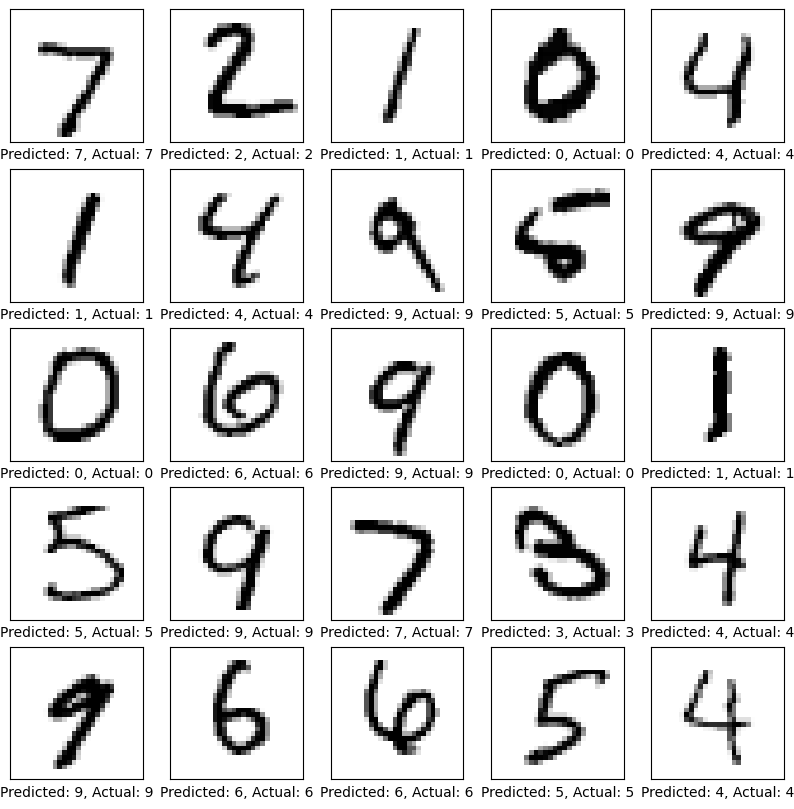

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {tf.argmax(predictions[i])}, Actual: {test_labels[i]}")
plt.show()
